# 單純貝氏分類器 Naive Bayes Classifier
- [維基百科](https://zh.wikipedia.org/zh-tw/%E6%9C%B4%E7%B4%A0%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%88%86%E7%B1%BB%E5%99%A8)

## 貝氏定理
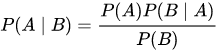

貝氏定理是機率中的一個定理，描述在已知一些條件下，某事件的發生機率。 
- 有間餐廳，一天總共來了100位客人，其中女性60人，男性40人。其中女性點了48份甜點，男性點了20份甜點。
- 請問有位客人點了一份甜點，請問這位客人是女性的機率 **P(女性|甜點)** 是多少？

通常，事件A在事件B已發生的條件下發生的機率，與事件B在事件A已發生的條件下發生的機率是不一樣的。



- P(女性) = 0.6
- P(甜點) = 0.68
- P(甜點|女性)=0.8
- **P(女性|甜點)** = P(女性) * P(甜點|女性) / P(甜點) = 0.6*0.8/0.68 = 70.59%
- **P(男性|甜點)** = P(男性) * P(甜點|男性) / P(甜點) = 0.4*0.5/0.68 = 29.41%



### 貝氏定理當分類器時
- 優點
    - 簡單、可解釋
    - 輸出為機率，非二元值
    - 可允許資料部分缺失
- 缺點
    - 當欄位值條件多時很難找到足夠的資料量支撐統計機率
    - 資料量大時計算時間長

那貝氏定理又和分類器有什麼關聯呢？首先我們要先知道分類器模型其實是把連續型的輸出 𝑋𝑤 轉換到離散型的輸出 𝑦̂，中間會經過兩個函數的運算，第一個函數用𝜎，第二個則用 𝐻 表示。

單純貝氏分類器是一系列以假設特徵之間強（樸素）獨立下運用貝葉斯定理為基礎的簡單機率分類器

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("data/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


當有一筆資料的 cap-shape = x 時，請問class為 'e' 的機率 P(class_e|cap-shape_x)？ <BR>
P(class_e|cap-shape_x) = P(class_e) * P(cap-shape_x|class_e) / P(shape_x)

In [7]:
p1 = (data['class']=='e').sum() / data.shape[0]
print('P(class_e) =', p1)

p2 = ((data['class']=='e')&(data['cap-shape']=='x')).sum() / (data['class']=='e').sum()
print('P(cap-shape_x | class_e) =', p2)

ans = (data['cap-shape']=='x').sum() / data.shape[0]
print('P(cap-shape_x) =', ans)
print('P(class_e | cap-shape_x) =', p1*p2/ans)

P(class_e) = 0.517971442639094
P(cap-shape_x | class_e) = 0.4629277566539924
P(cap-shape_x) = 0.4500246184145741
P(class_e | cap-shape_x) = 0.5328227571115973


當有一筆資料的 population = s 時，請問class為 'e' 的機率 P(class_p|population_s)？ <BR>
P(class_e|population_s) = P(class_e) * P(population_s|class_e) / P(population_s)

In [8]:
p1 = (data['class']=='e').sum() / data.shape[0]
print('P(class_e) =', p1)

p2 = ((data['class']=='e')&(data['population']=='s')).sum() / (data['class']=='e').sum()
print('P(population_s | class_e) =', p2)

ans = (data['population']=='s').sum() / data.shape[0]
print('P(population_s) =', ans)
print('P(class_e | population_s) =', p1*p2/ans)

P(class_e) = 0.517971442639094
P(population_s | class_e) = 0.20912547528517111
P(population_s) = 0.1536189069423929
P(class_e | population_s) = 0.7051282051282052


當有一筆資料的**條件T**=(cap-shape = x 且 population = s) 時，請問class為 'e' 的機率 P(class_e|條件T)？ <BR>
P(class_e|條件T) = P(class_e) * P(條件T|class_e) / P(條件T)

In [9]:
condition = ((data['cap-shape']=='x')&(data['population']=='s'))

p1 = (data['class']=='e').sum() / data.shape[0]
print('P(class_e) =', p1)

p2 = ((data['class']=='e')&condition).sum() / (data['class']=='e').sum()
print('P(condition | class_e) =', p2)

ans = condition.sum() / data.shape[0]
print('P(condition) =', ans)
print('P(class_e | condition) =', p1*p2/ans)

P(class_e) = 0.517971442639094
P(condition | class_e) = 0.09885931558935361
P(condition) = 0.07976366322008863
P(class_e | condition) = 0.6419753086419753


## 單純貝氏分類器

P(A|BC) = P(A) * P(BC|A) / P(BC)

如果 B C 兩者互相獨立，相關性為0。則 P(BC) = P(B) * P(C) 、 P(BC|A) = P(B|A) * P(C|A)<BR>
P(A|BC) = P(A) * P(B|A) * P(C|A) / (P(B) * P(C))

假設輸入欄位為 X1~Xn，預測輸出為Y。可以從訓練資料中預先計算所有 P(X1|Y)~P(Xn|Y) 跟 P(X1)~P(Xn)

In [45]:
p1 = (data['class']=='e').sum() / data.shape[0]
print('P(class_e) =', p1)

p2 = ((data['class']=='e')&(data['cap-shape']=='x')).sum() / (data['class']=='e').sum()
print('P(cap-shape_x|class_e) =', p2)

p3 = (data['cap-shape']=='x').sum() / data.shape[0]
print('P(cap-shape_x) =', p3)

p4 = ((data['class']=='e')&(data['population']=='s')).sum() / (data['class']=='e').sum()
print('P(population_s|class_e) =', p4)

p5 = (data['population']=='s').sum() / data.shape[0]
print('P(population_s) =', p5)
print('P(class_e|cap-shape_x&population_s) =', p1*p2*p4/(p3*p5))

P(class_e) = 0.517971442639094
P(cap-shape_x|class_e) = 0.4629277566539924
P(cap-shape_x) = 0.4500246184145741
P(population_s|class_e) = 0.20912547528517111
P(population_s) = 0.1536189069423929
P(class_e|cap-shape_x&population_s) = 0.7253456917611263


### 使用SKLEARN

In [67]:
from sklearn.preprocessing import LabelEncoder
encoded_data = data.apply(LabelEncoder().fit_transform)
x = encoded_data.drop('class',axis=1)
y = encoded_data['class']
encoded_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
scores = cross_val_score(MultinomialNB(),x,y,cv=5,scoring='accuracy')
print('MultinomialNB',scores.mean())
scores = cross_val_score(GaussianNB(),x,y,cv=5,scoring='accuracy')
print('GaussianNB',scores.mean())
scores = cross_val_score(BernoulliNB(),x,y,cv=5,scoring='accuracy')
print('BernoulliNB',scores.mean())

MultinomialNB 0.7267300492610838
GaussianNB 0.7259685486926866
BernoulliNB 0.7648645699128458


In [71]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
pca_x = pca.transform(x)
# scores = cross_val_score(MultinomialNB(),pca_x,y,cv=5,scoring='accuracy')
# print('MultinomialNB',scores.mean())
scores = cross_val_score(GaussianNB(),pca_x,y,cv=5,scoring='accuracy')
print('GaussianNB',scores.mean())
scores = cross_val_score(BernoulliNB(),pca_x,y,cv=5,scoring='accuracy')
print('BernoulliNB',scores.mean())

GaussianNB 0.5725011746873816
BernoulliNB 0.7380385752178855
